### From Jacques

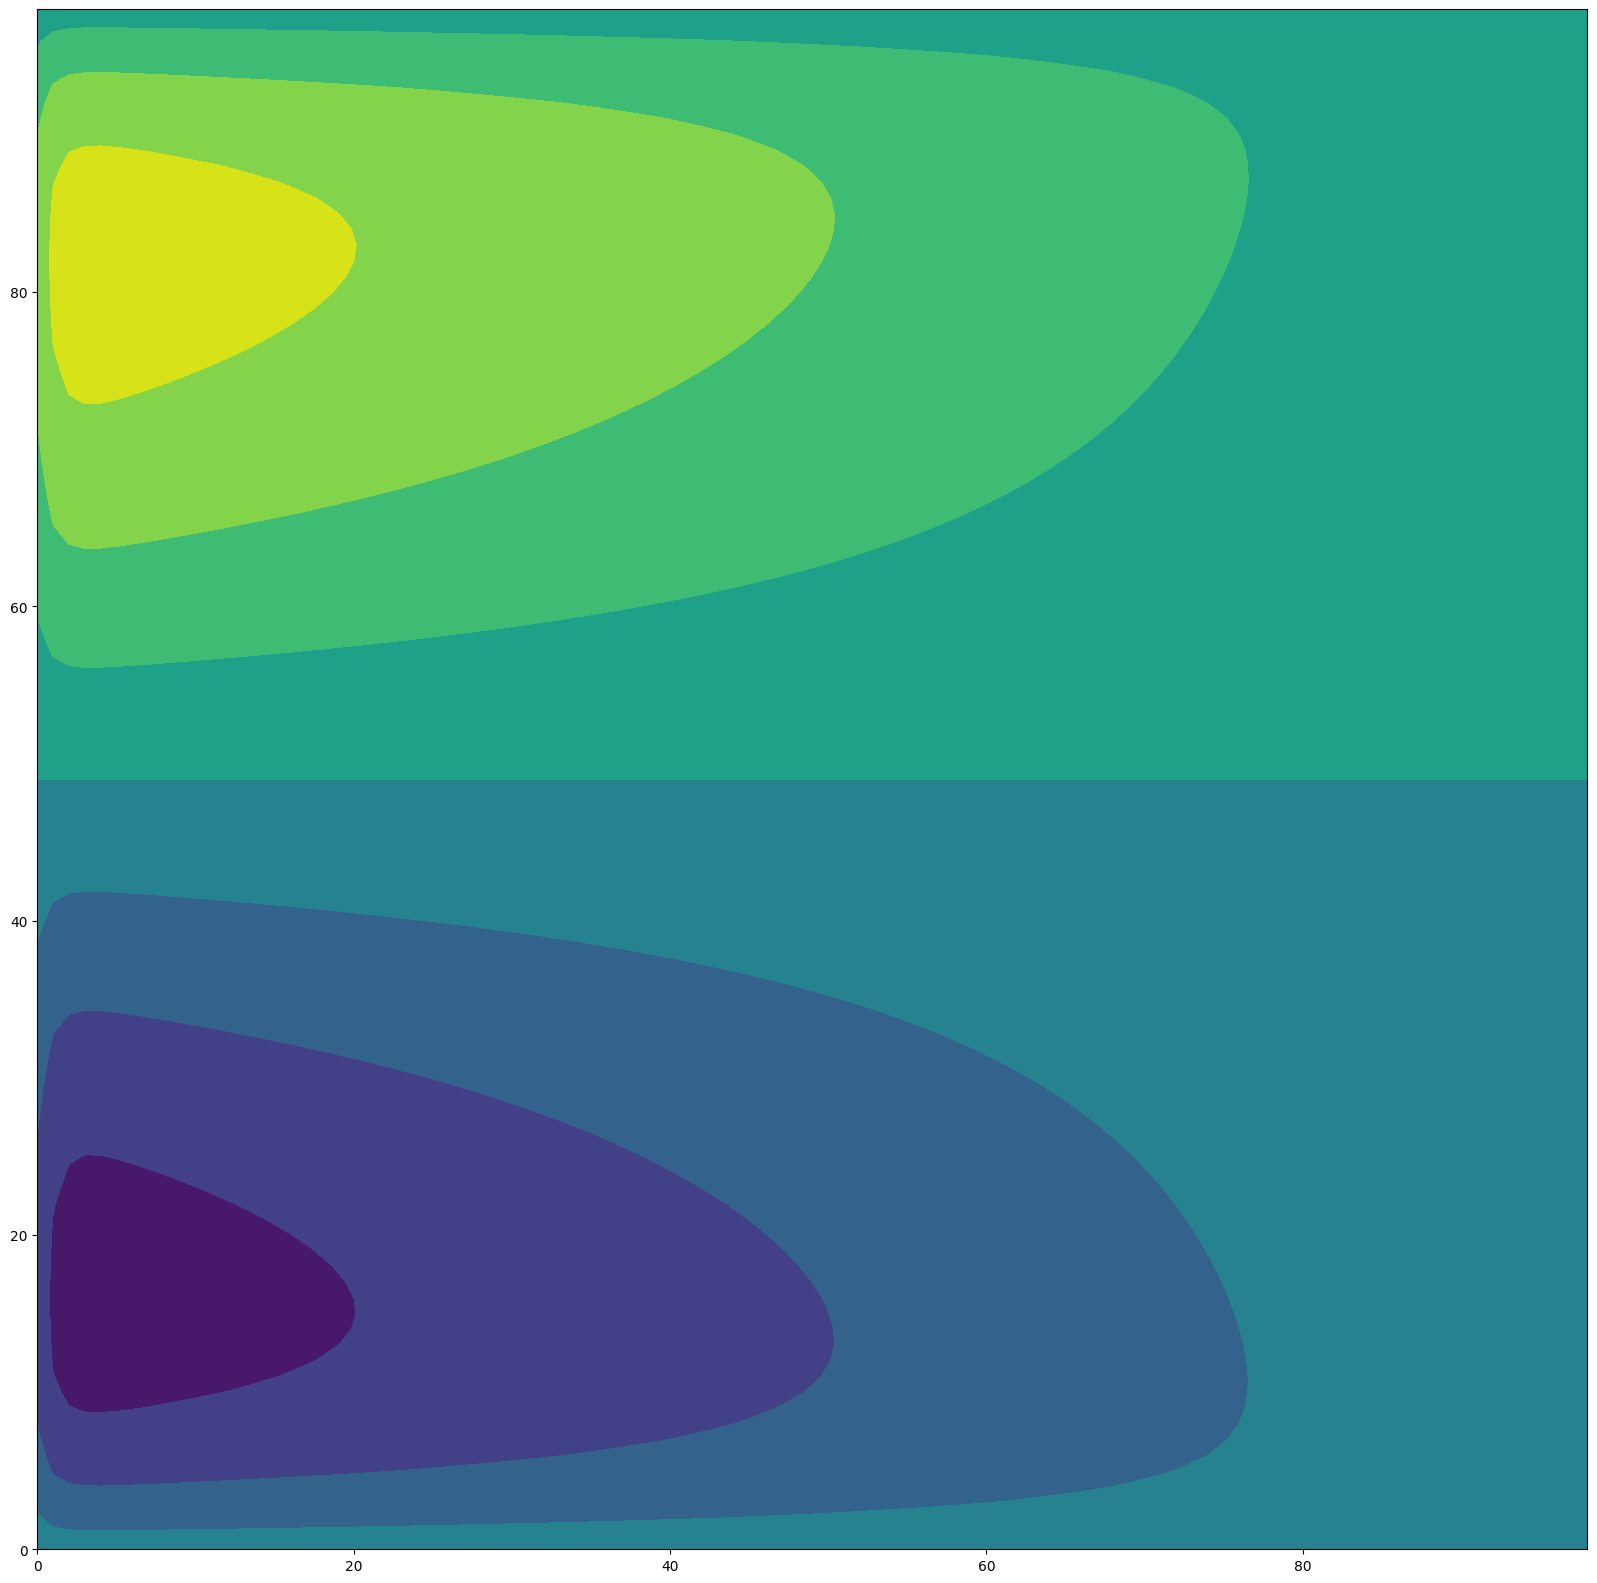

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
#from scipy.sparse.linalg import eigs

def laplacian2D(N):
    diag=np.ones([N*N])
    mat=sp.spdiags([diag,-2*diag,diag],[-1,0,1],N,N)
    I=sp.eye(N)
    return sp.kron(I,mat,format='csr')+sp.kron(mat,I)


def ddx2D(N):
    diag=np.ones([N*N])
    mat=sp.spdiags([-diag,0*diag,diag],[-1,0,1],N,N)
    I=sp.eye(N)
    return sp.kron(I,mat,format='csr')

def ddy2D(N):
    diag=np.ones([N*N])
    mat=sp.spdiags([-diag,0*diag,diag],[-1,0,1],N,N)
    I=sp.eye(N)
    return sp.kron(mat,I)



N = 100
dx = 1/N
x = np.linspace(dx,1-dx,N-1)
y = np.linspace(dx,1-dx,N-1)
x, y = np.meshgrid(x,y)
pi = np.pi

  
lap = laplacian2D(N-1)/dx**2
ddx = ddx2D(N-1)/(2*dx)
ddy = ddy2D(N-1)/(2*dx)
#lap = lap.toarray()

r = 0.01
beta = 1
nu = 0.001

A = r * lap + beta * ddx
B = - nu * lap.dot(lap) - beta * ddx
f = 0.005*np.cos(pi*y)
f_long = np.reshape(f,(N-1)**2)

niter=8
fig, ax = plt.subplots(1, figsize = (20, 20))

psi_long = spsolve(A,f_long)
psi = np.reshape(psi_long,(N-1,N-1)) 
plt.contourf(psi)


# for i in range(niter):
#     q_long = lap.dot(psi_long)
#     q_long_x = ddx.dot(q_long)
#     q_long_y = ddy.dot(q_long)
#     psi_long_x = ddx.dot(psi_long)
#     psi_long_y = ddy.dot(psi_long)
#     rhs_long = f_long - (psi_long_x*q_long_y - psi_long_y*q_long_x)
    
    
#     #psi_long = spsolve(A,rhs_long)
#     psi_long = spsolve(B,rhs_long)
    
#     psi = np.reshape(psi_long,(N-1,N-1)) 
#     ax[i].contourf(x,y,psi)




# psi = np.sin(5*pi*x)*np.sin(3*pi*y)


# psi_long = np.reshape(psi,((N-1)**2,1))

# #q_long = lap.dot(psi_long)
# q_long = ddy.dot(psi_long)

# q = np.reshape(q_long,(N-1,N-1))

# fig, ax = plt.subplots(2)

# ax[0].contourf(x,y,psi)
# ax[1].contourf(x,y,q)

#print(np.max(q)/pi)

#print(lap.toarray())
#vals, vecs = eigs(lap,k=(N-1)**2)
#print(vals)
#print(vecs)

 80%|████████  | 80/100 [00:20<00:05,  3.91it/s]


IndexError: index 8 is out of bounds for axis 0 with size 8

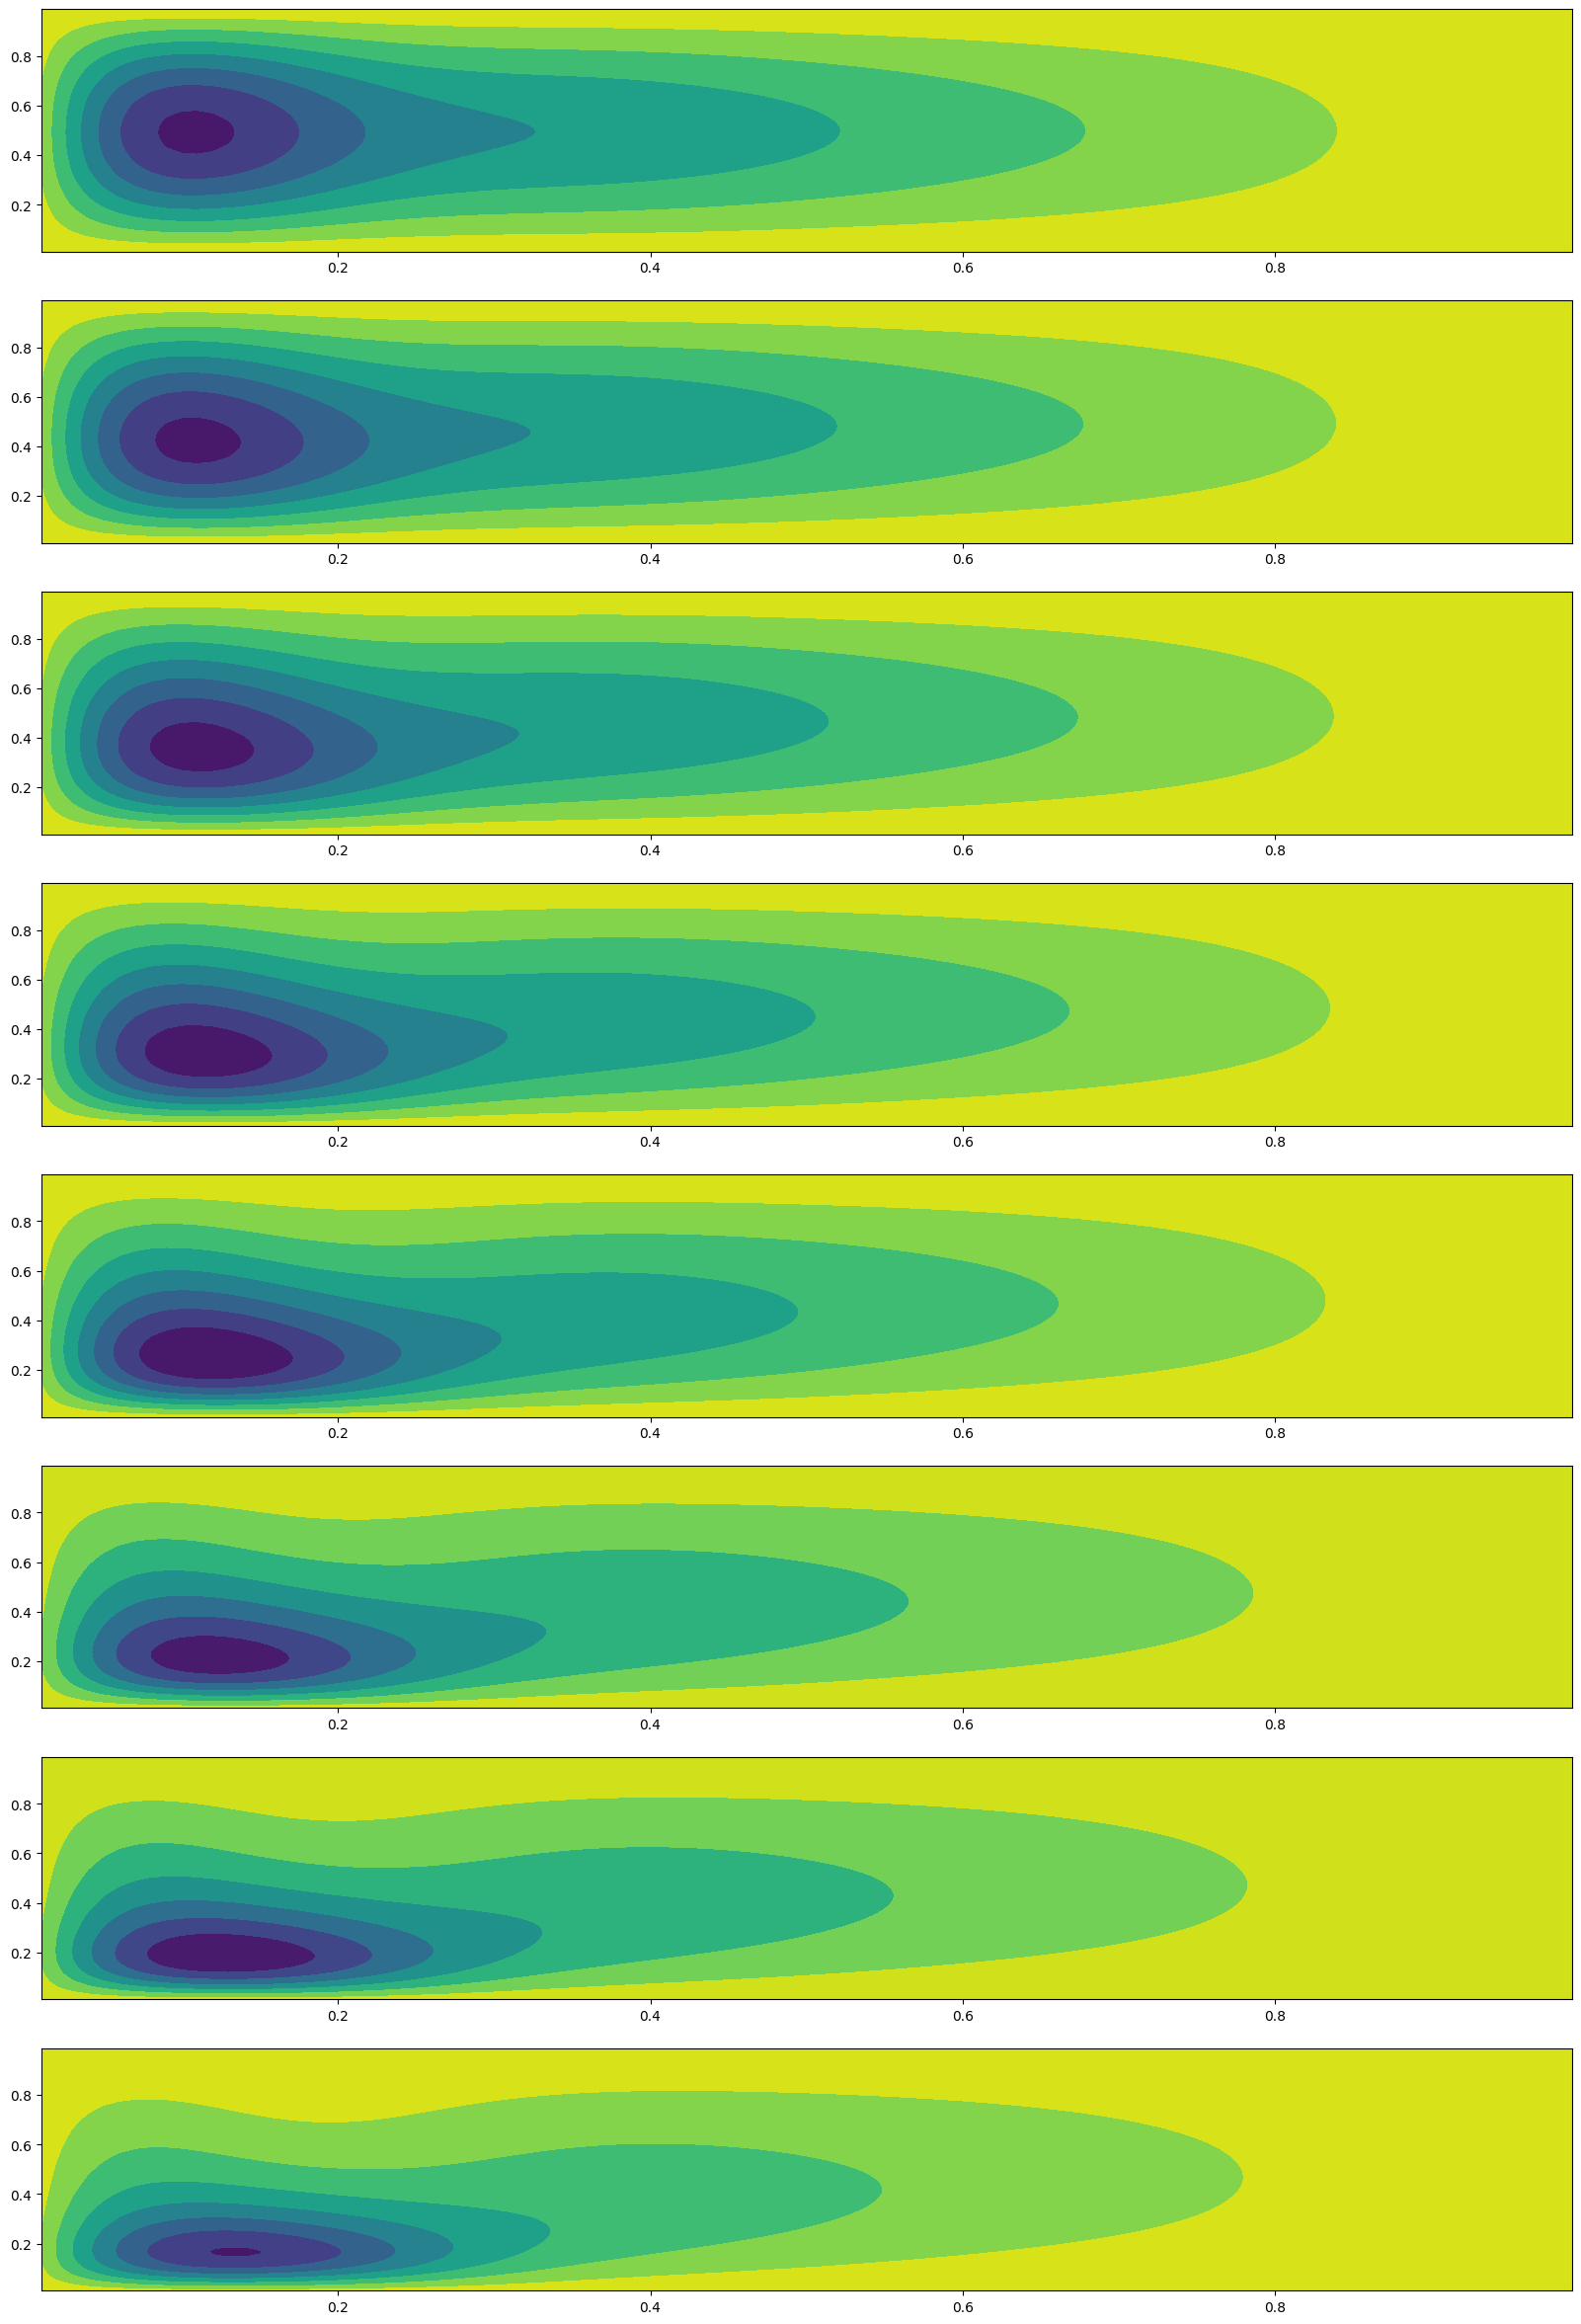

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
#from scipy.sparse.linalg import eigs

def laplacian2D(N):
    diag=np.ones([N*N])
    mat=sp.spdiags([diag,-2*diag,diag],[-1,0,1],N,N)
    I=sp.eye(N)
    return sp.kron(I,mat,format='csr')+sp.kron(mat,I)


def ddx2D(N):
    diag=np.ones([N*N])
    mat=sp.spdiags([-diag,0*diag,diag],[-1,0,1],N,N)
    I=sp.eye(N)
    return sp.kron(I,mat,format='csr')

def ddy2D(N):
    diag=np.ones([N*N])
    mat=sp.spdiags([-diag,0*diag,diag],[-1,0,1],N,N)
    I=sp.eye(N)
    return sp.kron(mat,I)



N = 100
dx = 1/N
x = np.linspace(dx,1-dx,N-1)
y = np.linspace(dx,1-dx,N-1)
x, y = np.meshgrid(x,y)
pi = np.pi
dt = 0.01

  
lap = laplacian2D(N-1)/dx**2
ddx = ddx2D(N-1)/(2*dx)
ddy = ddy2D(N-1)/(2*dx)
#lap = lap.toarray()

r = 0.1
beta = 1
nu = 0.0001

A = r * lap + beta * ddx
B = - nu * lap.dot(lap) + beta * ddx
C = 1/dt * lap - nu * lap.dot(lap) + beta * ddx
f = 0.05*np.sin(pi*y)
f_long = np.reshape(f,(N-1)**2)

niter=100
fig, ax = plt.subplots(8, figsize = (20, 30))

psi_long = spsolve(B,f_long) 
# psi = np.reshape(psi_long,(N-1,N-1)) 
# plt.contourf(psi)

from tqdm import tqdm

for i in tqdm(range(niter)):
    q_long = lap.dot(psi_long)
    q_long_x = ddx.dot(q_long)
    q_long_y = ddy.dot(q_long)
    psi_long_x = ddx.dot(psi_long)
    psi_long_y = ddy.dot(psi_long)
    rhs_long = f_long - (psi_long_x*q_long_y - psi_long_y*q_long_x) + 1/dt * lap.dot(psi_long)
    
    
    #psi_long = spsolve(A,rhs_long)
    psi_long = spsolve(C,rhs_long)


    # psi = np.reshape(psi_long,(N-1,N-1)) 
    # ax[i].contourf(x,y,psi)
    
    if i%10 == 0:
        psi = np.reshape(psi_long,(N-1,N-1)) 
        ax[round(i/10)].contourf(x,y,psi)




# psi = np.sin(5*pi*x)*np.sin(3*pi*y)


# psi_long = np.reshape(psi,((N-1)**2,1))

# #q_long = lap.dot(psi_long)
# q_long = ddy.dot(psi_long)

# q = np.reshape(q_long,(N-1,N-1))

# fig, ax = plt.subplots(2)

# ax[0].contourf(x,y,psi)
# ax[1].contourf(x,y,q)

#print(np.max(q)/pi)

#print(lap.toarray())
#vals, vecs = eigs(lap,k=(N-1)**2)
#print(vals)
#print(vecs)


In [ ]:
def psi_nonlin(x, y, epsilon):
    term1 = np.sin(np.pi * y) * (1 - x - np.exp(-x/epsilon))
    term2 = -(np.pi ** 3)/(2 * epsilon**3) * np.sin(2 * np.pi * y) * x * np.exp(-x/epsilon)

    return term1 + term2




### Compute C_1 and C_2

In [12]:
'''
Compute C_1 and C_2
'''
def C_constant(A, epsilon, root1, root2):
    '''
        Compute C_1, C_2 given A, epsilon and roots for the characteristic equation
    '''
    M = np.array([[1, 1], 
                  [np.exp(root1), np.exp(root2)]])
    M_A = np.full((2, 1), A/(epsilon * np.pi**2))
    
    C = np.linalg.inv(M) @ M_A
    
    return C[0], C[1]

epsilon = 0.5
A = np.pi
root1 = (-1 + np.sqrt(1 + 4 * (np.pi**2) * (epsilon**2)))/(2 * epsilon)
root2 = (-1 - np.sqrt(1 + 4 * (np.pi**2) * (epsilon**2)))/(2 * epsilon)

C_1, C_2 = C_constant(A, epsilon, root1, root2)

print(C_1, C_2)

[0.06323955] [0.57338022]


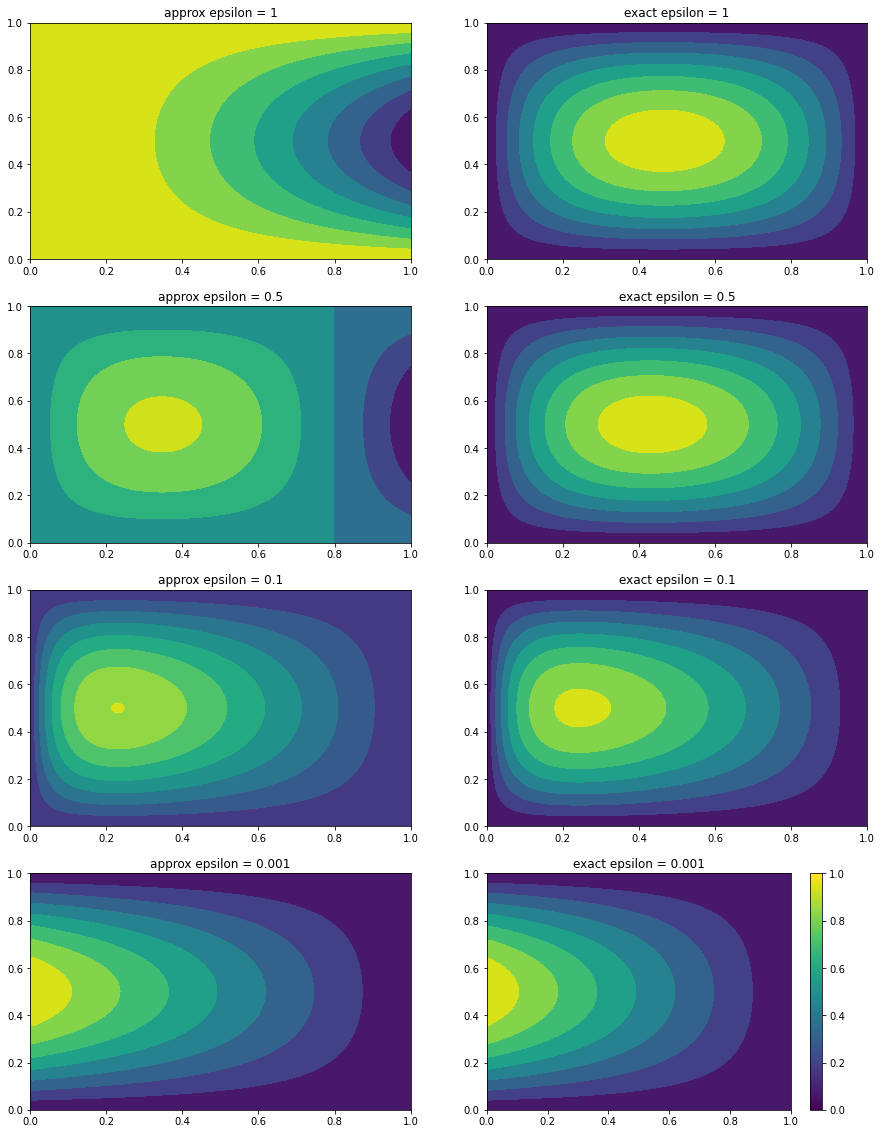

In [14]:
epsilons = [1, 0.5, 0.1, 0.001]

def psi_approx(x, y, epsilon, A):
    return (1 - x - np.exp(-x/epsilon)) * np.pi * np.sin(np.pi * y)

def psi_exact(x, y, epsilon, A, C_1, C_2):
    root1 = (-1 + np.sqrt(1 + 4 * (np.pi**2) * (epsilon**2)))/(2 * epsilon)
    root2 = (-1 - np.sqrt(1 + 4 * (np.pi**2) * (epsilon**2)))/(2 * epsilon)
    
    term1 = C_1 * np.exp(root1 * x)
    term2 = C_2 * np.exp(root2 * x)
    
    return -(term1 + term2 - A/((np.pi**2) * epsilon)) * np.sin(np.pi * y)

# def psi_exact(x, y, epsilon, A, C_1, C_2):
#     return (C_2 * np.exp(np.pi**2 * epsilon * x - x * epsilon **3 * np.pi**4) + \
#            C_1 * np.exp(-x/epsilon - np.pi**2 * epsilon * x + np.pi**4 * epsilon**3 * x) - \
#            A/(np.pi**2 * epsilon)) * np.sin(np.pi * y)

N = 1000
x = 1 - np.linspace(0,1,N)
y = np.linspace(0,1,N)
x, y = np.meshgrid(x,y)

fig, ax = plt.subplots(4, 2, figsize = (15, 20))

for i in range(4):
    epsilon = epsilons[i]
    A = np.pi
    root1 = (-1 + np.sqrt(1 + 4 * (np.pi**2) * (epsilon**2)))/(2 * epsilon)
    root2 = (-1 - np.sqrt(1 + 4 * (np.pi**2) * (epsilon**2)))/(2 * epsilon)
    
    C_1, C_2 = C_constant(A, epsilon, root1, root2)

    P_approx = psi_approx(x, y, epsilon, A)
    P_exact = psi_exact(x, y, epsilon, A, C_1, C_2)

    ax[i, 0].contourf(x, y, P_approx)
    ax[i, 1].contourf(x, y, P_exact)
    
    ax[i, 0].set(title = f'approx epsilon = {epsilon}', xlim = (0, 1))
    ax[i, 1].set(title = f'exact epsilon = {epsilon}', xlim = (0, 1))


fig.colorbar(plt.cm.ScalarMappable())
plt.show()

In [4]:
from sympy import symbols, integrate, sin, pi
import scipy
from tqdm import tqdm

def term_n(x, y, g, epsilon, n):
    y_p = symbols('y_p')
    A_n = integrate(g(y_p) * sin(n * np.pi * y_p), (y_p, -1, 1))
    print(A_n)

    root1 = (-1 + np.sqrt(1 + 4 * (n**2) * (np.pi**2) * (epsilon**2)))/(2 * epsilon)
    root2 = (-1 - np.sqrt(1 + 4 * (n**2) * (np.pi**2) * (epsilon**2)))/(2 * epsilon)

    M = np.array([[1, 1], 
                  [root1, root2]])
    M_A = np.full((2, 1), A_n/(epsilon * np.pi**2 * n**2))
    
    C = np.linalg.inv(M) @ M_A

    f_n = C[0] * np.exp(root1 * x) + C[1] * np.exp(root2 * x) - A_n/(n**2 * np.pi**2 * epsilon)
    
    return f_n


def psi(x, y, epsilon, g, N):
    Psi = np.empty_like(x)

    for n in tqdm(range(1, N + 1)):
        Psi = Psi + term_n(x, y, g, epsilon, n) * np.sin(np.pi * y)
    
    return Psi

In [7]:
N = 1000
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
x, y = np.meshgrid(x,y)

def g(y):
    return -np.pi * sin(np.pi * y)

Psi = psi(x, y, 0.5, g, 5)

fig, ax = plt.subplots(4, 2, figsize = (15, 20))

for i in range(4):
    epsilon = epsilons[i]
    print(epsilon)

    P_approx = psi_approx(x, y, epsilon, A)
    Psi = psi(x, y, epsilon, g, 1)

    ax[i, 0].contourf(x, y, P_approx)
    ax[i, 1].contourf(x, y, Psi)
    
    ax[i, 0].set(title = f'approx epsilon = {epsilon}', xlim = (0, 1))
    ax[i, 1].set(title = f'exact epsilon = {epsilon}', xlim = (0, 1))


fig.colorbar(plt.cm.ScalarMappable())
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

-3.14159265358979


  0%|          | 0/5 [00:38<?, ?it/s]


KeyboardInterrupt: 

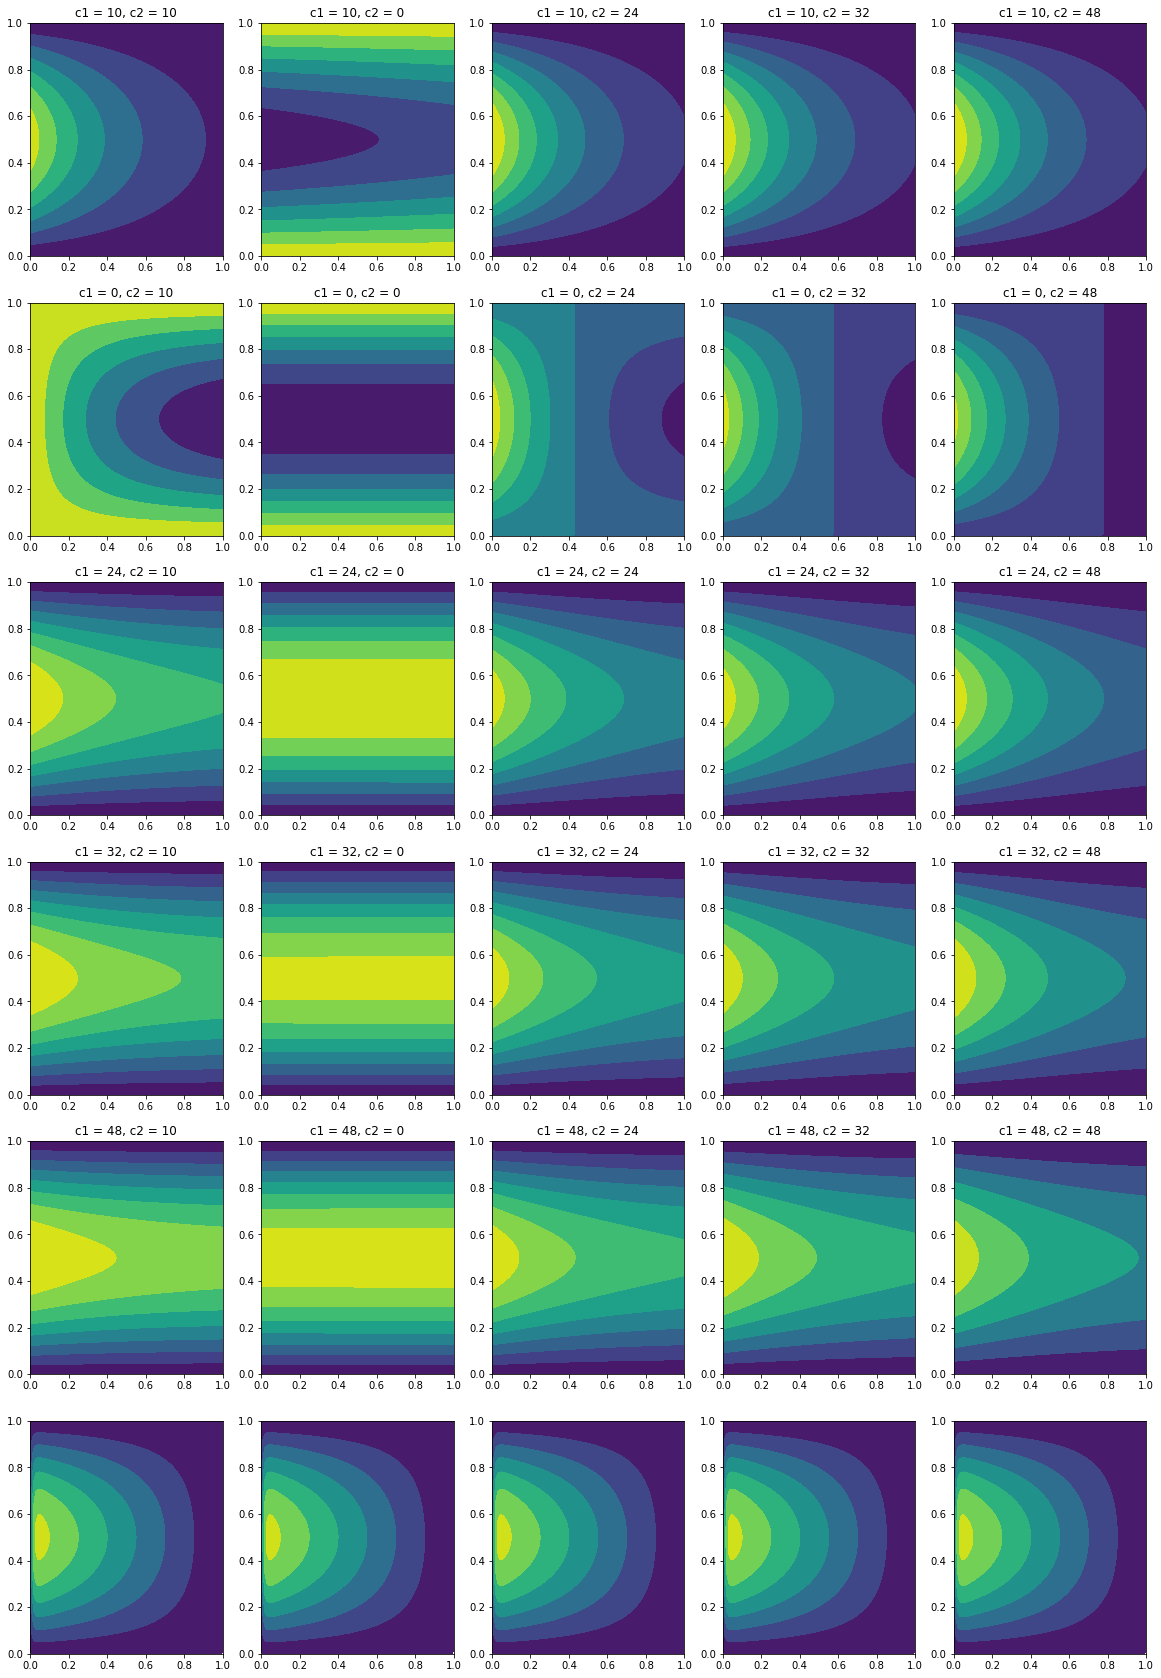

In [3]:
#fresh attempt at c variation using multiple plots rather than animation

epsilon = 0.01 
A = 1

C = [10, 0, 24, 32, 48]

def psi_approx(x, y):
    return (1 - x - np.exp(-x/epsilon)) * A * np.sin(np.pi * y)

def psi_exact(x, y, C_1, C_2):
    return np.sin(np.pi * y) * (C_1 * np.exp((-1 + np.sqrt(1 + 4 * epsilon**2 * np.pi**2))*x) + C_2 * np.exp((-1 - np.sqrt(1 + 4 * epsilon**2 * np.pi**2))*x) - A/(np.pi**2*epsilon))
    
N = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
x, y = np.meshgrid(x,y)

fig, ax = plt.subplots(6,5, figsize = (20,30))

for i in range(6):
    for j in range(5):
        if i == 5:
            ax[i,j].contourf(x,y,psi_approx(x,y))
        else:
            ax[i,j].contourf(x,y,psi_exact(x, y, C[i], C[j]))
            ax[i,j].set_title(f'c1 = {C[i]}, c2 = {C[j]}')



plt.show()

In [4]:
'''
Trying to Fourierise, this comes out with different C1 and C2 coefficients to what is in the overleaf so is wrong, but I 
cannot figure out where
''' 

import numpy as np
import sympy as sym
sym.init_printing()
from IPython.display import display_latex


x,n,y, epsilon = sym.symbols('x, n, y, epsilon')

f = sym.Function('f')
psi = sym.Function('psi')

#def func(x):
    #return 2*x
    
func = -sym.pi*sym.sin(sym.pi*y)
#func = 2*y

epsilon = 0.5
n = 1


def exact_sol(func):
    
    epos = sym.E**((-1 + sym.sqrt(1+4*n**2*sym.pi**2*epsilon**2))/(2*epsilon))
    eneg = sym.E**((-1 - sym.sqrt(1+4*n**2*sym.pi**2*epsilon**2))/(2*epsilon))
    
    eposx = sym.E**(((-1 + sym.sqrt(1+4*n**2*sym.pi**2*epsilon**2))/(2*epsilon)*x))
    enegx = sym.E**(((-1 - sym.sqrt(1+4*n**2*sym.pi**2*epsilon**2))/(2*epsilon)*x))
    
    #find our An value 
    integral = func*sym.sin(n*sym.pi*y)
    A_n = sym.integrate(integral,(y, -1, 1))
    
    #compute matri
    M = sym.Matrix([[1, 1], [epos, eneg]])
    
    A_vec = sym.Matrix([A_n/(n**2*sym.pi**2*epsilon), A_n/(n**2*sym.pi**2*epsilon)])
    #A_vec_2 = sym.Matrix([-1/(sym.pi*epsilon), -1/(sym.pi*epsilon)])
    
    #solve for c values
    C_vec = M.inv()*A_vec
    
    #round C for prettiness 
    for a in C_vec:
        C_vec = C_vec.subs(a, round(a, 2))
    
    solution = sym.Eq(C_vec[0]*eposx + C_vec[1]*enegx + (A_n/(epsilon*sym.pi**2*n**2)), psi(x))
    
    
    return solution


display_latex(exact_sol(func))